## Multi-class classification of CIFAR10 dataset using CNNs
- Mahdi Shahrajabian, November 2024


In [73]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
import time
import visualkeras


## CIFAR Dataset

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

print (y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print (y_test[0])

# Split training set into training and validation set
# idx = round(0.2*x_train.shape[0])
# x_val, x_train = x_train[:idx, ], x_train[idx:, ]
# y_val, y_train = y_train[:idx, ], y_train[idx:, ]
# print(f'Size of training-set  : {x_train.shape}')
# print(f'Size of validation-set: {x_val.shape}')

(50000, 32, 32, 3)
50000
10000
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


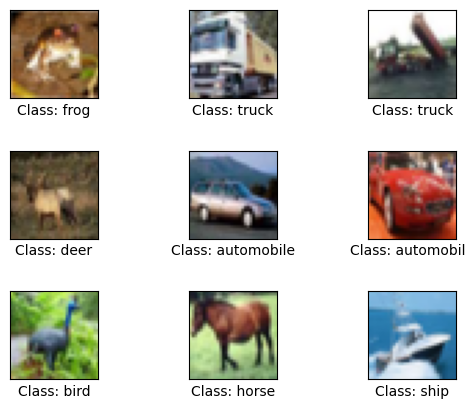

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    xlabel = "Class: {0}".format(class_names[y_train[i].argmax()])
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])

- Pixel data: 8-bit values (0-255)
- NN inputs: floating point values (0-1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_val = x_test.astype('float32')
x_train /= 255
#x_val /= 255
x_test /= 255

## CNN Model
### 1-Basic Model
- 4 Conv2D layer
- 0 Dropout layer
- 0 Batch normalization

In [20]:
def createModel(input_shape,kernel_size_n,Dense_n):

    model = Sequential()
    ## FIRST SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=32, kernel_size=(kernel_size_n,kernel_size_n), padding='same', input_shape=input_shape, activation='relu',))
    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=32, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))

    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ## SECOND SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=64, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ## THIRD SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=128, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
    model.add(Flatten())

    model.add(Dense(Dense_n, activation='relu'))
    # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
    model.add(Dense(10, activation='softmax'))

    return model

In [25]:
model = createModel(x_train.shape[1:],3,256)
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 629,610 (2.40 MB)

 Trainable params: 629,610 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

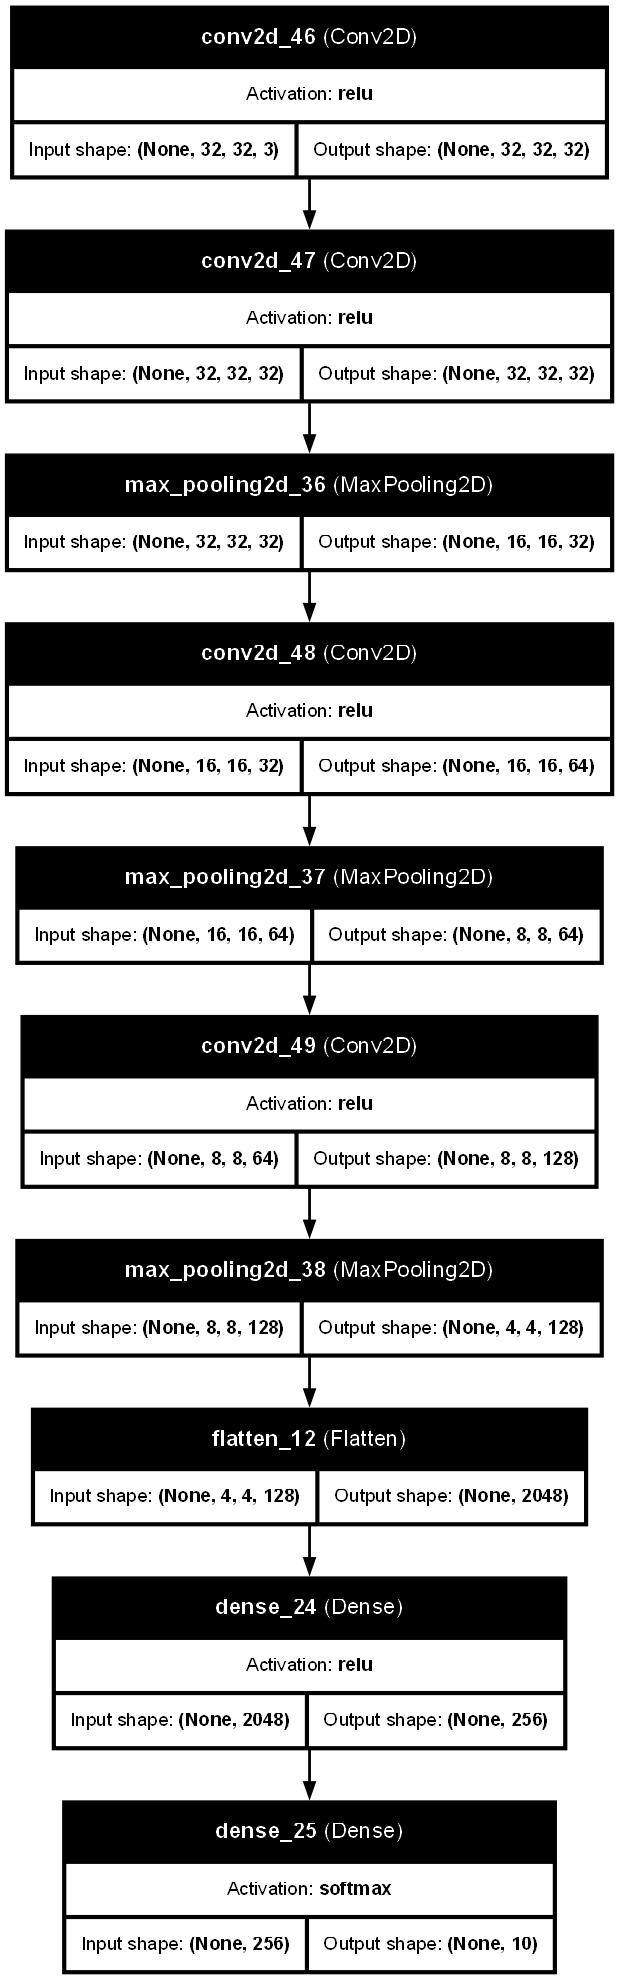

In [26]:
tf.keras.utils.plot_model(model, to_file="cnn_model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    dpi=100,
    layer_range=None,
    show_layer_activations=True)

In [27]:
visualkeras.layered_view(model)
#visualkeras.layered_view(model,legend=True, font=font).show() # display using your system viewer
visualkeras.layered_view(model, to_file='cnn_arc.png').show() # write and show

### 2-Parameter Study


In [28]:
kernel_size_n = [4, 3]
Dense_n = [256, 512]
num_parameters = []
elapsed_time = []
batch_size = []
kernel_size = []
dense_neuron = []
Test_accuracy = []
bs = [32, 64, 128]
it = 0    # case number

for j in range(len(bs)):
    for i in range(len(kernel_size_n)):
        for k in range(len(Dense_n)):
            model = createModel(x_train.shape[1:],kernel_size_n[i],Dense_n[k])
            opt = tf.keras.optimizers.Nadam(learning_rate=0.0015)
            model.compile(loss='categorical_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy'])
            num_parameters.append(model.count_params())
            start_time = time.time()
        
            history = model.fit(x_train, y_train,
                  batch_size=bs[j],
                  epochs=10,
                  validation_data=(x_test, y_test),
                  shuffle=True)
        
            elapsed_time.append(time.time() - start_time)
            scores = model.evaluate(x_test, y_test)
            Test_accuracy.append(scores[1])
            it += 1
            print("it: ",it)
            batch_size.append(bs[j])
            kernel_size.append(kernel_size_n[i])
            dense_neuron.append(Dense_n[k])
            

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - accuracy: 0.4237 - loss: 1.5745 - val_accuracy: 0.6347 - val_loss: 1.0823
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6944 - loss: 0.8673 - val_accuracy: 0.7163 - val_loss: 0.8147
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7653 - loss: 0.6711 - val_accuracy: 0.7293 - val_loss: 0.7863
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.8101 - loss: 0.5391 - val_accuracy: 0.7465 - val_loss: 0.7618
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.8401 - loss: 0.4562 - val_accuracy: 0.7548 - val_loss: 0.7811
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.8701 - loss: 0.3698 - val_accuracy: 0.7484 - val_loss: 0.8218
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.8913 - loss: 0.3066 - val_accuracy: 0.7450 - val_loss: 0.8778
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.9087 -

In [35]:
models_data = []  

# Distributing num_params among models based on their index  
for i in range(len(batch_size)):  
    model_info = {  
        "model_num": i + 1,  # Model numbers start from 1  
        "num_params": num_parameters[i % len(num_parameters)],  # Cycle through num_params  
        "batch_size": batch_size[i],
        "kernel_size": kernel_size[i],
        "dense_neuron": dense_neuron[i],
        "test_accuracy": Test_accuracy[i],  
        "elapsed_time": elapsed_time[i]  
    }  
    models_data.append(model_info) 
    
# Create the table header  
print(f"| {'Model #':<10} | {'Num of Params':<14} | {'Dense Neuron':<10} | {'Kernel size':<10} | {'Batch size':<10} | {'Test accuracy (10 Epochs)':<25} | {'Elapsed Time (s)':<16} |")  
print("|" + "-"*12 + "|" + "-"*16 + "|" + "-"*14 + "|" + "-"*13 + "|"  + "-"*12 + "|"  + "-"*27 + "|" + "-"*18 + "|")  

# Loop through each model and print its data  
for model in models_data:  
    print(f"| {model['model_num']:<10} | {model['num_params']:<14} | {model['dense_neuron']:<12} | {model['kernel_size']:<11} | {model['batch_size']:<10} | {model['test_accuracy'] * 100:<5.2f}%                    | {model['elapsed_time']:<5.2f}           |")

| Model #    | Num of Params  | Dense Neuron | Kernel size | Batch size | Test accuracy (10 Epochs) | Elapsed Time (s) |
|------------|----------------|--------------|-------------|------------|---------------------------|------------------|
| 1          | 709130         | 256          | 4           | 32         | 73.37%                    | 671.14           |
| 2          | 1236234        | 512          | 4           | 32         | 73.64%                    | 871.83           |
| 3          | 629610         | 256          | 3           | 32         | 76.22%                    | 591.65           |
| 4          | 1156714        | 512          | 3           | 32         | 76.07%                    | 725.40           |
| 5          | 709130         | 256          | 4           | 64         | 74.17%                    | 657.23           |
| 6          | 1236234        | 512          | 4           | 64         | 75.43%                    | 677.88           |
| 7          | 629610         | 

### 3-Train the model for 10 Epochs

In [21]:
model = createModel(x_train.shape[1:],3,256)

opt = tf.keras.optimizers.Nadam(learning_rate=0.0015)
model.compile(loss='categorical_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])

start_time = time.time()

history = model.fit(x_train, y_train,
      batch_size=64,
      epochs=10,
      validation_data=(x_test, y_test),
      shuffle=True)
elapsed_time = time.time() - start_time
print(elapsed_time)

scores = model.evaluate(x_test, y_test)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.4055 - loss: 1.6265 - val_accuracy: 0.6513 - val_loss: 0.9889
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7019 - loss: 0.8511 - val_accuracy: 0.7081 - val_loss: 0.8523
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7738 - loss: 0.6540 - val_accuracy: 0.7261 - val_loss: 0.7916
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.8149 - loss: 0.5199 - val_accuracy: 0.7601 - val_loss: 0.7184
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8545 - loss: 0.4180 - val_accuracy: 0.7624 - val_loss: 0.7129
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.8808 - loss: 0.3389 - val_accuracy: 0.7614 - val_loss: 0.7802
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.9058 - loss: 0.2645 - val_accuracy: 0.7736 - val_loss: 0.8039
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.9265 - loss: 0.2071 - 

### 4-Batch Normalization

In [36]:
def createModel_BN(input_shape,kernel_size_n,Dense_n):

    model = Sequential()
    ## FIRST SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=32, kernel_size=(kernel_size_n,kernel_size_n), padding='same', input_shape=input_shape, activation='relu',))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    model.add(BatchNormalization())
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ## SECOND SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=64, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    model.add(BatchNormalization())
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ## THIRD SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=128, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    model.add(BatchNormalization())
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
    model.add(Flatten())

    model.add(Dense(Dense_n, activation='relu'))
    model.add(BatchNormalization())
    # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
    model.add(Dense(10, activation='softmax'))

    return model

In [38]:
model_BN = createModel_BN(x_train.shape[1:],3,256)

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model_BN.compile(loss='categorical_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])
start_time = time.time()

history_BN = model_BN.fit(x_train, y_train,
      batch_size=64,
      epochs=10,
      validation_data=(x_test, y_test),
      shuffle=True)
elapsed_time = time.time() - start_time
print(elapsed_time)

scores_BN = model_BN.evaluate(x_test, y_test)

print('Test loss (BN):', scores_BN[0])
print('Test accuracy (BN):', scores_BN[1])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 121ms/step - accuracy: 0.5264 - loss: 1.3761 - val_accuracy: 0.6170 - val_loss: 1.1085
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.7456 - loss: 0.7321 - val_accuracy: 0.7055 - val_loss: 0.8806
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.8086 - loss: 0.5518 - val_accuracy: 0.7579 - val_loss: 0.7284
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.8517 - loss: 0.4280 - val_accuracy: 0.7713 - val_loss: 0.6901
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.8905 - loss: 0.3193 - val_accuracy: 0.7812 - val_loss: 0.7018
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.9232 - loss: 0.2250 - val_accuracy: 0.7755 - val_loss: 0.7540
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.9375 - loss: 0.1852 - val_accuracy: 0.7754 - val_loss: 0.7713
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 141ms/step - accuracy: 0.9580 - los

### 5-Dropout

In [39]:
def createModel_DO(input_shape,kernel_size_n,Dense_n):

    model = Sequential()
    ## FIRST SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=32, kernel_size=(kernel_size_n,kernel_size_n), padding='same', input_shape=input_shape, activation='relu',))
    model.add(Conv2D(filters=32, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    ## SECOND SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=64, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    ## THIRD SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=128, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
    model.add(Flatten())

    model.add(Dense(Dense_n, activation='relu'))
    # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))

    return model

In [42]:
model_DO = createModel_DO(x_train.shape[1:],3,256)

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model_DO.compile(loss='categorical_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])
start_time = time.time()

history_DO = model_DO.fit(x_train, y_train,
      batch_size=64,
      epochs=10,
      validation_data=(x_test, y_test),
      shuffle=True)
elapsed_time = time.time() - start_time
print(elapsed_time)

scores_DO = model_DO.evaluate(x_test, y_test)

print('Test loss (DO):', scores_DO[0])
print('Test accuracy (DO):', scores_DO[1])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 79ms/step - accuracy: 0.3476 - loss: 1.7672 - val_accuracy: 0.5874 - val_loss: 1.1595
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.5908 - loss: 1.1441 - val_accuracy: 0.6876 - val_loss: 0.8900
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.6748 - loss: 0.9275 - val_accuracy: 0.7144 - val_loss: 0.8237
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.7139 - loss: 0.8165 - val_accuracy: 0.7430 - val_loss: 0.7436
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.7372 - loss: 0.7384 - val_accuracy: 0.7360 - val_loss: 0.7566
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.7637 - loss: 0.6722 - val_accuracy: 0.7745 - val_loss: 0.6665
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.7793 - loss: 0.6313 - val_accuracy: 0.7792 - val_loss: 0.6384
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.7927 - loss: 0.5884 - 

### 6-Final Model

In [ ]:
def createModel_final(input_shape,kernel_size_n,Dense_n):

    model = Sequential()
    ## FIRST SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=32, kernel_size=(kernel_size_n,kernel_size_n), padding='same', input_shape=input_shape, activation='relu',))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    model.add(BatchNormalization())
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    ## SECOND SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=64, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    model.add(BatchNormalization())
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    ## THIRD SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=128, kernel_size=(kernel_size_n,kernel_size_n), padding='same', activation='relu',))
    model.add(BatchNormalization()) 
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
    model.add(Flatten())

    model.add(Dense(Dense_n, activation='relu'))
    model.add(BatchNormalization())
    # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))

    return model

In [19]:
model_final = createModel_final(x_train.shape[1:],3,256)

opt = tf.keras.optimizers.Nadam(learning_rate=0.0015)
model_final.compile(loss='categorical_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])
start_time = time.time()

history_final = model_final.fit(x_train, y_train,
      batch_size=64,
      epochs=10,
      validation_data=(x_test, y_test),
      shuffle=True)
elapsed_time = time.time() - start_time
print(elapsed_time)

scores_final = model_final.evaluate(x_test, y_test)

print('Test loss (final):', scores_final[0])
print('Test accuracy (final):', scores_final[1])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 120ms/step - accuracy: 0.4376 - loss: 1.6815 - val_accuracy: 0.6212 - val_loss: 1.0827
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.6608 - loss: 0.9657 - val_accuracy: 0.6868 - val_loss: 0.9311
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.7242 - loss: 0.7881 - val_accuracy: 0.7359 - val_loss: 0.7630
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - accuracy: 0.7530 - loss: 0.7032 - val_accuracy: 0.7619 - val_loss: 0.6713
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.7748 - loss: 0.6415 - val_accuracy: 0.7500 - val_loss: 0.7515
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.7932 - loss: 0.5930 - val_accuracy: 0.7442 - val_loss: 0.7817
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.8104 - loss: 0.5408 - val_accuracy: 0.7938 - val_loss: 0.5985
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.8245 - los

In [103]:
model_final.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_118 (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_119 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_90 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_120 (Conv2D)                  │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_91 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_121 (Conv2D)                  │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_92 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_30 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │           2,5

 Total params: 1,892,929 (7.22 MB)

 Trainable params: 630,634 (2.41 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 1,261,271 (4.81 MB)

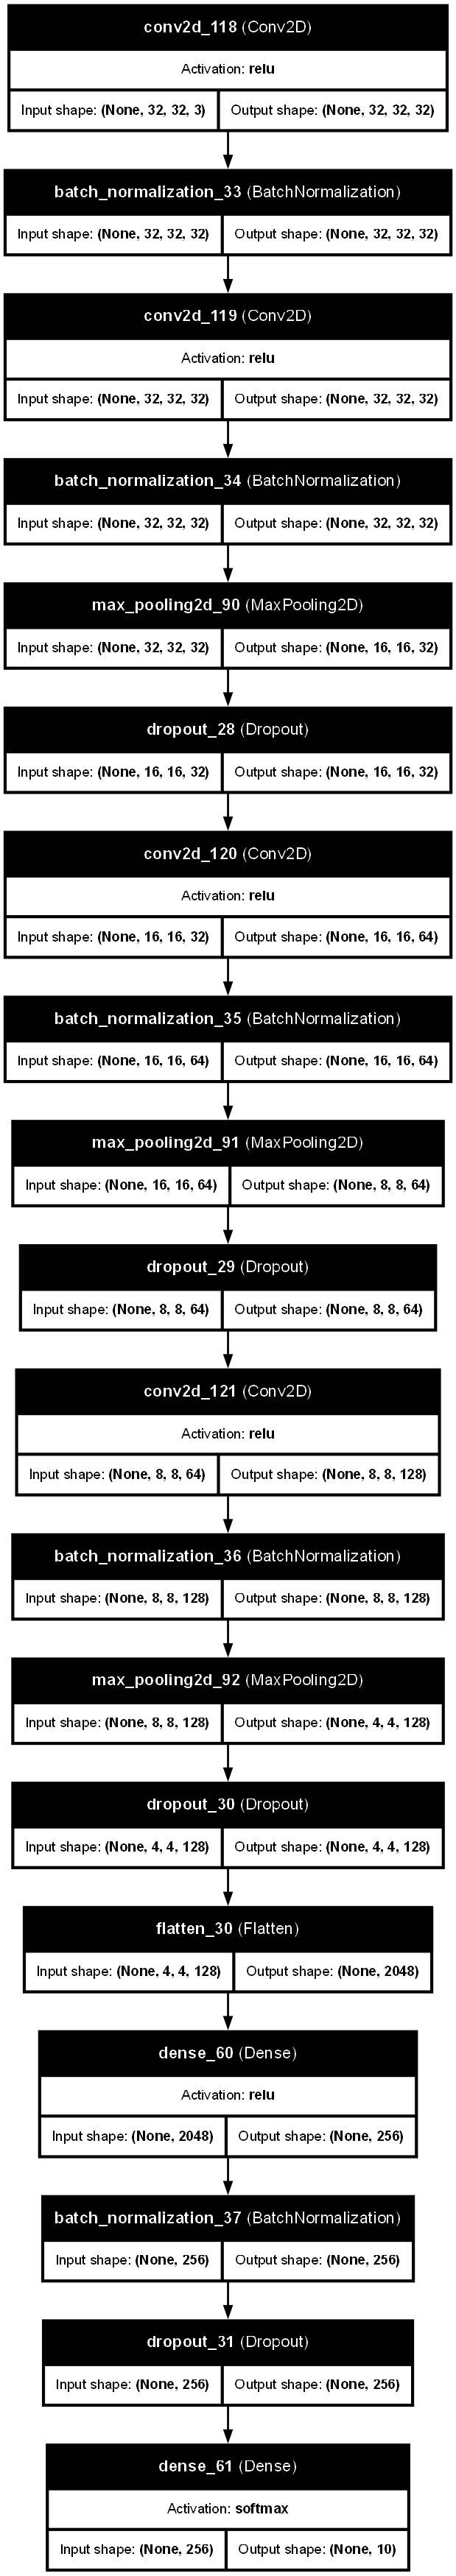

In [104]:
tf.keras.utils.plot_model(model_final, to_file="cnn_model_final.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    dpi=100,
    layer_range=None,
    show_layer_activations=True)

### 7-Result Comparison

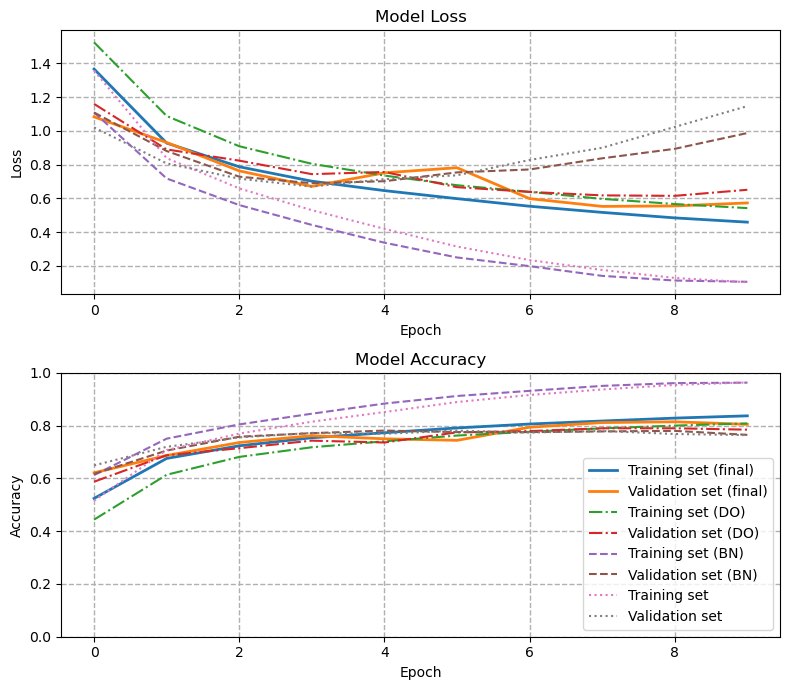

In [67]:
def render_training_history_loss(train_hist, train_hist_BN, train_hist_DO, train_hist_final):
    loss = train_hist.history['loss']
    validation = train_hist.history['val_loss']
    loss_BN = train_hist_BN.history['loss']
    validation_BN = train_hist_BN.history['val_loss']
    loss_DO = train_hist_DO.history['loss']
    validation_DO = train_hist_DO.history['val_loss']
    loss_final = train_hist_final.history['loss']
    validation_final = train_hist_final.history['val_loss']

    acc = train_hist.history['accuracy']
    acc_val = train_hist.history['val_accuracy']
    acc_BN = train_hist_BN.history['accuracy']
    acc_val_BN = train_hist_BN.history['val_accuracy']
    acc_DO = train_hist_DO.history['accuracy']
    acc_val_DO = train_hist_DO.history['val_accuracy']
    acc_final = train_hist_final.history['accuracy']
    acc_val_final = train_hist_final.history['val_accuracy']
    
    
    plt.figure(figsize=(8, 7))
    plt.subplot(2, 1, 1) 
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss_final, label='Training set (final)',linewidth=2)
    plt.plot(validation_final, label='Validation set (final)',linewidth=2)
    plt.plot(loss_DO, label='Training set (DO)',linestyle='-.')
    plt.plot(validation_DO, label='Validation set (DO)',linestyle='-.')
    plt.plot(loss_BN, label='Training set (BN)',linestyle='--')
    plt.plot(validation_BN, label='Validation set (BN)',linestyle='--')
    plt.plot(loss, label='Training set',linestyle=':')
    plt.plot(validation, label='Validation set',linestyle=':')
    #plt.legend(loc='upper right')
    #plt.ylim(0,3)
    plt.grid(linestyle='--', linewidth=1)

    plt.subplot(2, 1, 2) 
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(acc_final, label='Training set (final)',linewidth=2)
    plt.plot(acc_val_final, label='Validation set (final)',linewidth=2)
    plt.plot(acc_DO, label='Training set (DO)',linestyle='-.')
    plt.plot(acc_val_DO, label='Validation set (DO)',linestyle='-.')
    plt.plot(acc_BN, label='Training set (BN)',linestyle='--')
    plt.plot(acc_val_BN, label='Validation set (BN)',linestyle='--')
    plt.plot(acc, label='Training set',linestyle=':')
    plt.plot(acc_val, label='Validation set',linestyle=':')


    plt.legend(loc='lower right')
    plt.ylim(0,1)
    plt.grid(linestyle='--', linewidth=1)
    
    plt.tight_layout()
    plt.savefig("Q1_loss_acc.png", dpi=300, bbox_inches='tight')  
    plt.savefig("Q1_loss_acc.pdf", bbox_inches='tight')
    plt.show()
    
render_training_history_loss(history, history_BN, history_DO, history_final)

### 8-Train the Final Model for 30 Epochs

In [69]:
model_final = createModel_final(x_train.shape[1:],3,256)

opt = tf.keras.optimizers.Nadam(learning_rate=0.0015)
model_final.compile(loss='categorical_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])
start_time = time.time()

history_final = model_final.fit(x_train, y_train,
      batch_size=64,
      epochs=30,
      validation_data=(x_test, y_test),
      shuffle=True)
elapsed_time = time.time() - start_time
print(elapsed_time)

scores_final = model_final.evaluate(x_test, y_test)

print('Test loss (final):', scores_final[0])
print('Test accuracy (final):', scores_final[1])

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 165ms/step - accuracy: 0.4508 - loss: 1.6547 - val_accuracy: 0.6446 - val_loss: 0.9995
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 153ms/step - accuracy: 0.6721 - loss: 0.9276 - val_accuracy: 0.7131 - val_loss: 0.8305
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.7258 - loss: 0.7734 - val_accuracy: 0.7329 - val_loss: 0.7617
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.7657 - loss: 0.6750 - val_accuracy: 0.7156 - val_loss: 0.8390
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 142ms/step - accuracy: 0.7820 - loss: 0.6247 - val_accuracy: 0.7785 - val_loss: 0.6479
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.8057 - loss: 0.5633 - val_accuracy: 0.7965 - val_loss: 0.5953
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.8093 - loss: 0.5347 - val_accuracy: 0.7812 - val_loss: 0.6430
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.8241 - lo

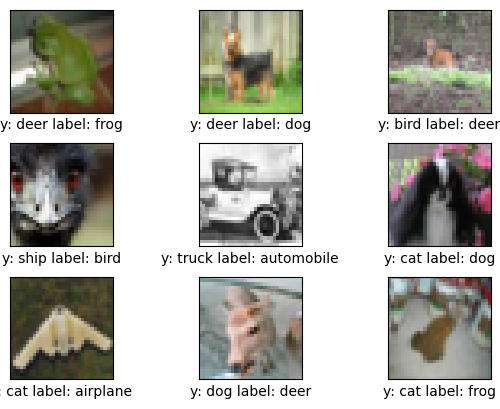

In [71]:
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.3, wspace=0.6)

cont = 0
for i, ax in enumerate(axes.flat):
    while 1:
        cont += 1
        test_image = x_test[cont,:]
        predicted_cat = model_final.predict(np.array([test_image]), verbose=0).argmax()
        label = y_test[cont].argmax()
        if (predicted_cat != label):
            break
    ax.imshow(test_image)
    xlabel = 'y: %s label: %s' % (class_names[predicted_cat], class_names[label])
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])

## Save weights

In [98]:
model_final.save('cifar_10epochs.keras')

## Results

In [100]:
from sklearn.metrics import classification_report

# predictions = model.predict_classes(x_test)
predictions = (model_final.predict(x_test) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.96      0.89      0.92      1000
           2       0.83      0.74      0.78      1000
           3       0.75      0.64      0.69      1000
           4       0.79      0.86      0.82      1000
           5       0.82      0.70      0.76      1000
           6       0.88      0.86      0.87      1000
           7       0.93      0.83      0.87      1000
           8       0.84      0.93      0.88      1000
           9       0.85      0.94      0.90      1000

   micro avg       0.85      0.82      0.84     10000
   macro avg       0.85      0.82      0.83     10000
weighted avg       0.85      0.82      0.83     10000
 samples avg       0.82      0.82      0.82     10000



C:\Users\Mahdi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


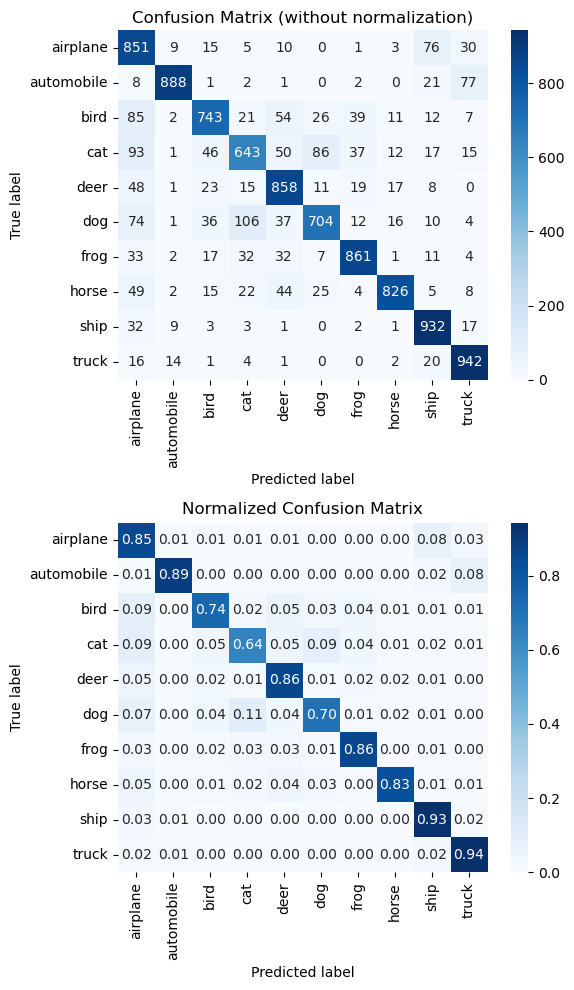

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns  

def plot_confusion_matrix(y_true, y_pred, class_names): 
    y_true_labels = np.argmax(y_true, axis=1)  # Get indices of the max value (1 in this case)  
    y_pred_labels = np.argmax(y_pred, axis=1)  # Same for predicted values  
    
    # Compute the confusion matrix  
    cm = confusion_matrix(y_true_labels, y_pred_labels)  
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        
    # Set up the matplotlib figure  
    plt.figure(figsize=(6, 10))  

    # Create a heatmap with seaborn 
    plt.subplot(2,1,1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',   
                xticklabels=class_names, yticklabels=class_names)  
    # Set labels and title  
    plt.ylabel('True label')  
    plt.xlabel('Predicted label')  
    plt.title('Confusion Matrix (without normalization)')
    
    plt.subplot(2,1,2)
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',   
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')  
    plt.xlabel('Predicted label')  
    plt.title('Normalized Confusion Matrix') 
    plt.tight_layout()
    plt.savefig("Q1_confusion.png", dpi=300, bbox_inches='tight')  
    plt.savefig("Q1_confusion.pdf", bbox_inches='tight')
    plt.show()  

predictions = (model_final.predict(x_test) > 0.5)
y_true = (y_test>0.5)
plot_confusion_matrix(y_true, predictions,class_names)